In [1]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re

In [2]:
# Download and read the medical transcriptions dataset from Kaggle
# Note: Requires kaggle API credentials to be set up
!kaggle datasets download -d tboyle10/medicaltranscriptions -p temp_data
!unzip temp_data/medicaltranscriptions.zip -d temp_data

# Read the CSV file
medical_df = pd.read_csv('temp_data/mtsamples.csv')
print(f"Loaded medical transcriptions dataset with {len(medical_df)} records")


Dataset URL: https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions
License(s): CC0-1.0
medicaltranscriptions.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  temp_data/medicaltranscriptions.zip
replace temp_data/mtsamples.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
Loaded medical transcriptions dataset with 4999 records


In [3]:
# Clean the medical transcriptions dataset:
nlp = spacy.load('en_core_web_sm')

def clean_text(text:str) -> str:
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    doc = nlp(text)
    text = ' '.join(token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS and token.is_alpha)
    return text

medical_df = medical_df[~medical_df['transcription'].isnull()]
medical_df['cleaned_transcription'] = medical_df['transcription'].apply(clean_text)

In [4]:
df_out = medical_df[~medical_df['transcription'].isnull()]
print(df_out.shape)
df_out.head()

(4966, 7)


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective old white female present complaint ...
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past MEDICAL HISTORY difficulty climb stair di...
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history present ILLNESS see ABC today pleasant...
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",M MODE leave atrial enlargement leave atrial d...
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",left ventricular cavity size wall thickness ap...


In [5]:
# Remove any rows where there is a missing column
df_out = df_out.dropna(axis=0)
print(df_out.shape)
df_out.head()


(3898, 7)


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective old white female present complaint ...
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past MEDICAL HISTORY difficulty climb stair di...
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history present ILLNESS see ABC today pleasant...
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",M MODE leave atrial enlargement leave atrial d...
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",left ventricular cavity size wall thickness ap...


In [6]:
import os

if not os.path.exists('../temp_data/medical_transcriptions'):
    os.makedirs('../temp_data/medical_transcriptions')

df_out.iloc[:300].to_csv('../temp_data/medical_transcriptions/mt_samples_300.csv', index=False)

In [7]:
pd.set_option('display.max_rows', 20)
df_out.head(20)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective old white female present complaint ...
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past MEDICAL HISTORY difficulty climb stair di...
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history present ILLNESS see ABC today pleasant...
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",M MODE leave atrial enlargement leave atrial d...
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",left ventricular cavity size wall thickness ap...
5,5,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r...",PREOPERATIVE DIAGNOSIS Morbid obesity DIAGNOSI...
6,6,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma...",PREOPERATIVE DIAGNOSES deformity right breast ...
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram...",ECHOCARDIOGRAM multiple view heart great vesse...
8,8,Suction-assisted lipectomy - lipodystrophy of...,Bariatrics,Lipectomy - Abdomen/Thighs,"PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the...","bariatrics, lipodystrophy, abd pads, suction-a...",PREOPERATIVE DIAGNOSIS Lipodystrophy abdomen t...
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,...",DESCRIPTION normal cardiac chamber size normal...


## Analysis of Labelled Dataset

We now analyse the labelled medication transcriptions dataset. Potential confounding factors in this dataset:

- The label may depend upon the descriptiveness of the doctor writing the transcription e.g. some doctors may write the full risks of a standard procedure whilst others might keep it the same

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the labelled dataset
labelled_df = pd.read_csv('../temp_data/medical_transcriptions/mt_samples_300_labeled.csv')

# Display the first few rows of the dataset
labelled_df.head()

,inputs,labels,ids,explanation
0,subjective old white female present complaint ...,low-stakes,0,The situation involves a patient's inquiry abo...
1,past MEDICAL HISTORY difficulty climb stair di...,ambiguous,1,The situation presents a detailed medical hist...
2,history present ILLNESS see ABC today pleasant...,high-stakes,2,The situation involves a patient with multiple...
3,M MODE leave atrial enlargement leave atrial d...,low-stakes,3,The situation describes a medical report with ...
4,left ventricular cavity size wall thickness ap...,low-stakes,4,The situation describes a medical examination ...


Text(0.5, 1.0, 'Distribution of High, Low and Ambiguous Stakes in Labelled Dataset')

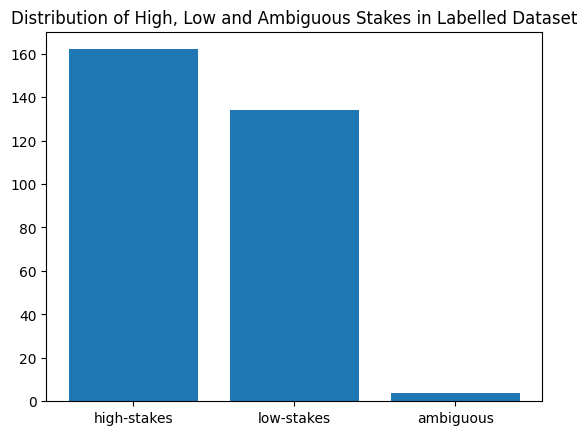

In [13]:
plt.bar(labelled_df['labels'].value_counts().index, labelled_df['labels'].value_counts().values)
plt.title('Distribution of High, Low and Ambiguous Stakes in Labelled Dataset')